## CASSANDRA'22 Round 1  
### Team - GREEKGODS

####     BASIC IMPORTS

In [1]:
import pathlib
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from tqdm.notebook import tqdm
import warnings
warnings.simplefilter(action='ignore', category=Warning)

#### LOAD DATA

In [9]:
train_df = pd.read_csv('trainData.csv')
test_df = pd.read_csv('testData.csv')
train_df

,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding,Number_of_Days_until_Payment
0,Milk x 7 ltrs,David Taylor,26-04-2011 11:50,26-Apr-11,26-May-11,672.78,672.78,0.0,13
1,Office Stationery,Stephen Wright MD,24-05-2011 09:40,24-May-11,23-Jun-11,5101.98,5101.98,0.0,38
2,Milk x 10 ltrs,Mark Cordova,24-05-2011 12:56,24-Mar-11,23-Apr-11,7422.78,7422.78,0.0,61
3,Annual Fee,Kimberly White,09-07-2011 10:42,10-May-11,24-May-11,11.98,11.98,0.0,62
4,NaN,Teresa Marshall,05-09-2011 20:55,05-Sep-11,06-Sep-11,5501.98,5501.98,0.0,2
...,...,...,...,...,...,...,...,...,...
8748,NaN,Amy Sawyer,31-10-2017 14:40,29-Sep-17,29-Oct-17,551.98,551.98,0.0,34
8749,NaN,Edward Santiago,31-10-2017 14:44,29-Sep-17,29-Oct-17,386.98,386.98,0.0,34
8750,NaN,Angela Becker,31-10-2017 22:07,31-Oct-17,01-Nov-17,279.81,279.81,0.0,5
8751,NaN,Anna Carter,02-11-2017 10:51,23-Oct-17,06-Nov-17,145.98,145.98,0.0,10


#### TRAINING DATA ANALYSIS

In [10]:
train_df.describe()

,Amount,Settled,Outstanding,Number_of_Days_until_Payment
count,8.753000e+03,8.753000e+03,8753.000000,8753.000000
mean,2.320905e+03,2.236365e+03,84.539806,43.953616
std,1.140826e+05,1.140800e+05,791.098158,28.149191
min,1.990000e+00,1.980000e+00,0.000000,-23.000000
25%,8.118000e+01,7.698000e+01,0.000000,21.000000
50%,1.901900e+02,1.819800e+02,0.000000,42.000000
75%,6.019800e+02,5.599800e+02,0.000000,64.000000
max,1.066667e+07,1.066667e+07,27930.000000,141.000000


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753 entries, 0 to 8752
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Description                   1261 non-null   object 
 1   Vendor_Name                   8753 non-null   object 
 2   Created                       8753 non-null   object 
 3   Invoice_Date                  8753 non-null   object 
 4   Due_Date                      8753 non-null   object 
 5   Amount                        8753 non-null   float64
 6   Settled                       8753 non-null   float64
 7   Outstanding                   8753 non-null   float64
 8   Number_of_Days_until_Payment  8753 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 615.6+ KB


#### TRAINING DATA VISUALIZATION

<AxesSubplot:>

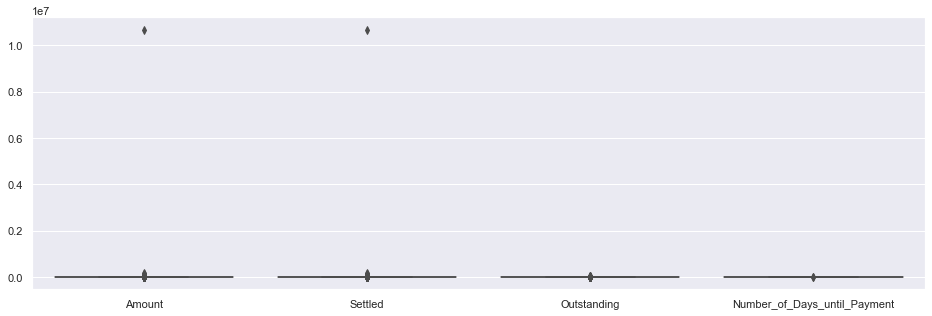

In [5]:
sns.set(rc={'figure.figsize': (16, 5)})
sns.boxplot(data=train_df.select_dtypes(include='number'))

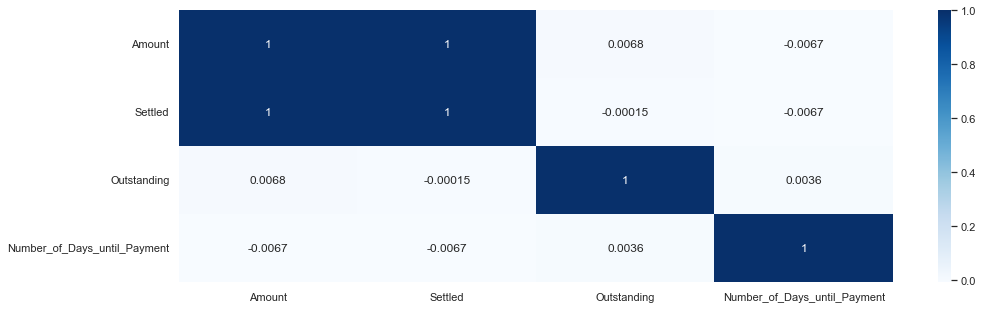

In [6]:
dataplot = sns.heatmap(train_df.corr(), cmap="Blues", annot=True)
plt.show()

<AxesSubplot:xlabel='Amount', ylabel='Density'>

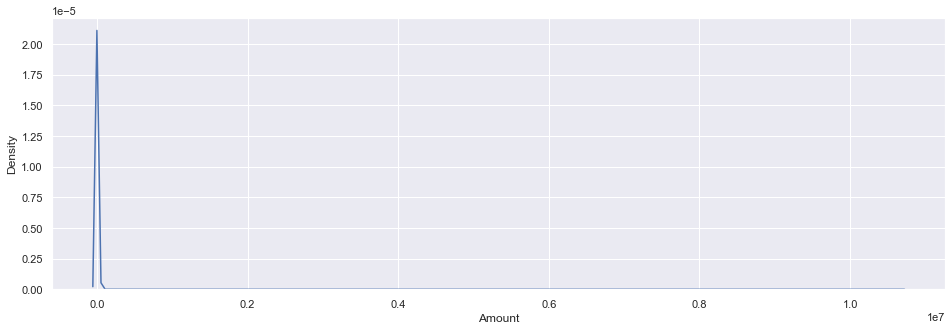

In [7]:
sns.kdeplot(data=train_df, x="Amount")

<AxesSubplot:xlabel='Outstanding', ylabel='Density'>

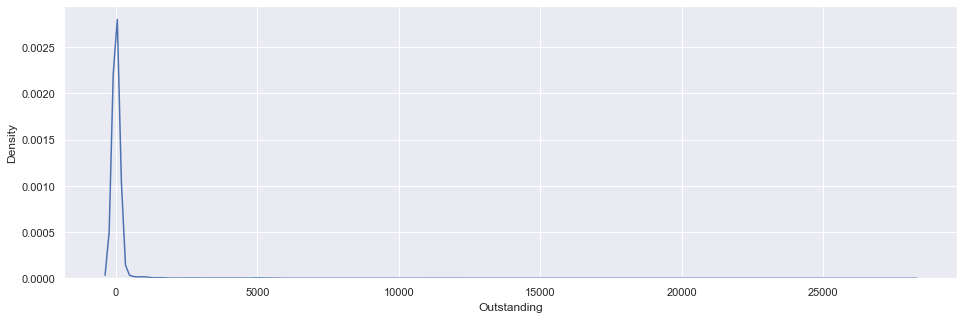

In [8]:
sns.kdeplot(data=train_df, x="Outstanding")

<AxesSubplot:xlabel='Number_of_Days_until_Payment', ylabel='Density'>

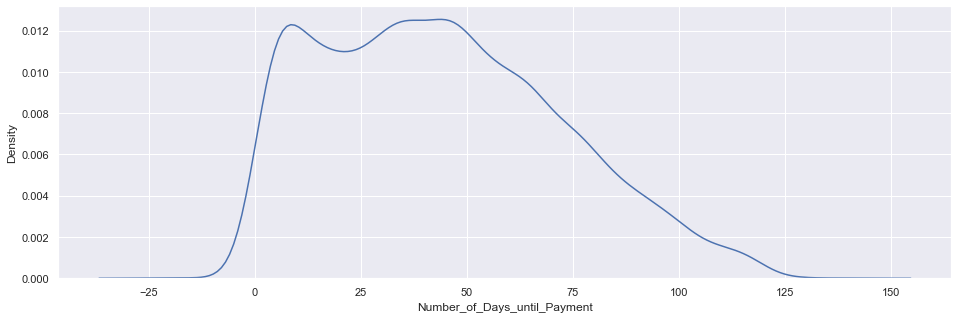

In [9]:
sns.kdeplot(data=train_df, x="Number_of_Days_until_Payment")

### FEATURE ENGINEERING

>Converting ['Created', 'Invoice_Date', 'Due_Date'] to datetime format

In [12]:
def dateing(df):
    df['Created'] = pd.to_datetime(df['Created'])
    df['Invoice_Date'] = pd.to_datetime(df['Invoice_Date'])
    df['Due_Date'] = pd.to_datetime(df['Due_Date'])

    return df

In [13]:
train_df = dateing(train_df)
test_df = dateing(test_df)
train_df.head(15)

,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding,Number_of_Days_until_Payment
0,Milk x 7 ltrs,David Taylor,2011-04-26 11:50:00,2011-04-26,2011-05-26,672.78,672.78,0.00,13
1,Office Stationery,Stephen Wright MD,2011-05-24 09:40:00,2011-05-24,2011-06-23,5101.98,5101.98,0.00,38
2,Milk x 10 ltrs,Mark Cordova,2011-05-24 12:56:00,2011-03-24,2011-04-23,7422.78,7422.78,0.00,61
3,Annual Fee,Kimberly White,2011-09-07 10:42:00,2011-05-10,2011-05-24,11.98,11.98,0.00,62
4,NaN,Teresa Marshall,2011-05-09 20:55:00,2011-09-05,2011-09-06,5501.98,5501.98,0.00,2
5,NaN,Christian Ellis,2011-12-10 09:57:00,2011-10-12,2011-10-26,605.51,501.98,103.53,6
6,Office stationery,Courtney Smith,2011-10-26 12:24:00,2011-09-26,2011-10-27,2701.98,2701.98,0.00,35
7,Reverse misposting,Mario Peters,2011-10-26 15:47:00,2011-10-26,2011-11-25,3869.58,3869.58,0.00,26
8,Reverse mispost,Kelly Gray,2011-10-31 14:45:00,2011-10-31,2011-11-30,7801.98,7801.98,0.00,35
9,NaN,Teresa Marshall,2011-12-11 15:21:00,2011-11-12,2011-11-26,1048.28,1048.28,0.00,7


##### Filling Missing Values in 'Description'
> After a thorough analysis of the 'Description' column and using different techniques to fill the missing value, we sorted the data using the 'Created' column and then used the forward fill technique to fill the missing. This idea also correlates with the fact that while entering the invoice details on the accounting system, the 'Description' for continuous invoices having the same description doesn't need to be repeated.

In [14]:
train_df = train_df.sort_values(by='Created')
test_df = test_df.sort_values(by='Created')

In [15]:
train_df['Description'] = train_df['Description'].ffill()
test_df['Description'] = test_df['Description'].ffill()
test_df = test_df.sort_index()
test_df.head(15)

,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding
0,Annual Fee,Aaron Hoffman,2015-11-26 12:38:00,2015-11-30,2015-12-30,11.98,11.98,0.00
1,Amazon UK,Aaron Murphy,2016-10-27 10:35:00,2016-09-06,2016-10-06,56.98,56.98,0.00
2,Internet,Aaron Parks,2016-02-29 00:53:00,2016-02-29,2016-03-14,61.98,61.98,0.00
3,meterage copy costs,Aaron Thomas,2013-08-27 18:46:00,2013-08-23,2013-09-06,674.30,674.30,0.00
4,AX bill,Abigail Hernandez,2017-05-16 16:48:00,2017-05-10,2017-06-09,302.94,302.94,0.00
5,March charges,Abigail Matthews,2016-06-23 01:53:00,2016-06-23,2016-07-07,181.98,181.98,0.00
6,Food for foyer,Adam Evans,2017-04-01 13:53:00,2017-01-04,2017-01-18,2431.98,2431.98,0.00
7,Freight,Adam Hudson,2015-09-30 12:07:00,2015-09-30,2015-10-30,88.74,23.80,64.94
8,Painting & Decorating work,Adam Johnson,2013-12-09 09:41:00,2013-09-12,2013-09-26,55.98,55.98,0.00
9,iStock subscription,Adam Jones,2015-08-25 20:15:00,2015-08-07,2015-09-06,139.94,139.94,0.00


##### Months and Years
> We extracted the Months and Year from ['Created', 'Invoice_Date', 'Due_Date']. This idea is based on the fact that a specific month and year can tell a lot about a person's income and wealth, especially for businesses in which certain months are more profitable than others. This can greatly influence the time taken to make the payment.
- Feature 'D_Month' : 'Due_Date' Month
- Feature 'I_Month' : 'Invoice_Date' Month
- Feature 'C_Month' : 'Created' Month
- Feature 'year' : 'Created' Year

##### Time Given To make the payment
>This feature will be a key feature in determinig the number of days till payment. 
- Feature 'D_I' : 'Due_Date - Invoice_Date'
- Feature 'D_C' : 'Due_Date - Created'

In [16]:
def creater(df):
    df['D_I'] = ((df.Due_Date-df.Invoice_Date)/np.timedelta64(1,'D'))
    df['D_I'] = df['D_I'].astype(int)
    
    df['D_C'] = ((df.Due_Date-df.Created)/np.timedelta64(1,'D'))
    df['D_C'] = df['D_C'].astype(int)
    
    df['D_Month'] = pd.DatetimeIndex(df['Due_Date']).month
    df['I_Month'] = pd.DatetimeIndex(df['Invoice_Date']).month
    df['C_Month'] = pd.DatetimeIndex(df['Created']).month
    
    df['year'] = pd.DatetimeIndex(df['Created']).year
        
    return df

In [17]:
train_df = creater(train_df)
test_df = creater(test_df)


In [18]:
train_df

,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding,Number_of_Days_until_Payment,D_I,D_C,D_Month,I_Month,C_Month,year
0,Milk x 7 ltrs,David Taylor,2011-04-26 11:50:00,2011-04-26,2011-05-26,672.78,672.78,0.0,13,30,29,5,4,4,2011
4,Milk x 7 ltrs,Teresa Marshall,2011-05-09 20:55:00,2011-09-05,2011-09-06,5501.98,5501.98,0.0,2,1,119,9,9,5,2011
1,Office Stationery,Stephen Wright MD,2011-05-24 09:40:00,2011-05-24,2011-06-23,5101.98,5101.98,0.0,38,30,29,6,5,5,2011
2,Milk x 10 ltrs,Mark Cordova,2011-05-24 12:56:00,2011-03-24,2011-04-23,7422.78,7422.78,0.0,61,30,-31,4,3,5,2011
3,Annual Fee,Kimberly White,2011-09-07 10:42:00,2011-05-10,2011-05-24,11.98,11.98,0.0,62,14,-106,5,5,9,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8453,Rear Split,Steven Gardner,2017-12-07 09:17:00,2017-07-12,2017-08-11,133.98,133.98,0.0,57,30,-118,8,7,12,2017
8454,Rear Split,Ms. Rebecca Drake MD,2017-12-07 11:21:00,2017-07-12,2017-08-11,909.68,909.68,0.0,91,30,-118,8,7,12,2017
8661,Rear Split,Travis Cunningham,2017-12-09 15:10:00,2017-09-12,2017-10-12,301.98,301.98,0.0,7,30,-58,10,9,12,2017
8662,Rear Split,Travis Cunningham,2017-12-09 15:18:00,2017-09-12,2017-10-12,301.98,301.98,0.0,7,30,-58,10,9,12,2017


##### Encoding ['Description'	,'Vendor_Name'] columns using Target Encoding
> After reading, research, and experimentation, the best encoding technique we could find for encoding ['Description'	, 'Vendor_Name'] columns is Target Encoding. We tried Cross-Fold Target Encoding and Leave-one-out Target Encoding, resulting in many Nan values. Since Vendor Name is one of the essential features for predicting the Number of Days until Payment, as it tells about the Vendor's history, we could not afford to lose any data. We decided to go with Target Encoding. We tried a few different features to do encoding, but Target encoding gave the best result.

In [19]:
# !pip install category_encoders
import category_encoders as ce
def target(df):
    encoder=ce.TargetEncoder(cols='Description')
    # # df['Des_out']=encoder.fit_transform(df['Description'],df['Outstanding'])
    # # df['Des_out'] = df['Des_out'].astype(int)
    # # df['D_I_E']=encoder.fit_transform(df['Description'],df['D_I'])
    # # df['D_I_E'] = df['D_I_E'].astype(int)
    df['Des_num']=encoder.fit_transform(df['Description'],df['Number_of_Days_until_Payment'])
    df['Des_num']=df['Des_num'].astype(int)
    encoder=ce.TargetEncoder(cols='Vendor_Name')
    # df['Ven_out']=encoder.fit_transform(df['Vendor_Name'],df['Outstanding'])
    # df['Ven_out'] = df['Ven_out'].astype(int)
    # df['D_I_V']=encoder.fit_transform(df['Vendor_Name'],df['D_I'])
    # df['D_I_V'] = df['D_I_V'].astype(int)
    df['Ven_num']=encoder.fit_transform(df['Vendor_Name'],df['Number_of_Days_until_Payment'])
    df['Ven_num']=df['Ven_num'].astype(int)
    return df

In [20]:
train_df=target(train_df)
# test_dft(test_df)

##### Encoding the testing data
>Encoding the testing data using the 'Description' and 'Vendor_Name' dictionaries made using the training data. Since there were a few values in the testing data's Description, which were not there in the training data, we encoded such values using the mode of the training data's Encodings.

In [21]:
test_df['Des_num']=np.zeros
for i in tqdm(range(0,len(test_df))):
  for j in range(0,len(train_df)):
    if test_df['Description'][i]==train_df['Description'][j] :
      test_df['Des_num'][i]=train_df['Des_num'][j]

    elif j == len(train_df)-1:
      test_df['Des_num'][i]=45

  0%|          | 0/1125 [00:00<?, ?it/s]

In [22]:
test_df

,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding,D_I,D_C,D_Month,I_Month,C_Month,year,Des_num
0,Annual Fee,Aaron Hoffman,2015-11-26 12:38:00,2015-11-30,2015-12-30,11.98,11.98,0.0,30,33,12,11,11,2015,45
1,Amazon UK,Aaron Murphy,2016-10-27 10:35:00,2016-09-06,2016-10-06,56.98,56.98,0.0,30,-21,10,9,10,2016,45
2,Internet,Aaron Parks,2016-02-29 00:53:00,2016-02-29,2016-03-14,61.98,61.98,0.0,14,13,3,2,2,2016,45
3,meterage copy costs,Aaron Thomas,2013-08-27 18:46:00,2013-08-23,2013-09-06,674.30,674.30,0.0,14,9,9,8,8,2013,45
4,AX bill,Abigail Hernandez,2017-05-16 16:48:00,2017-05-10,2017-06-09,302.94,302.94,0.0,30,23,6,5,5,2017,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,March charges,Zachary Coleman,2016-08-31 13:09:00,2016-08-29,2016-09-12,4201.98,4201.98,0.0,14,11,9,8,8,2016,45
1121,3rd Instalment,Zachary Dudley,2014-07-28 10:43:00,2014-07-28,2014-08-04,93.18,93.18,0.0,7,6,8,7,7,2014,45
1122,AX bill,Zachary Hernandez,2017-05-09 10:14:00,2017-09-02,2017-09-06,1255.98,1255.98,0.0,4,119,9,9,5,2017,45
1123,Employer service charge JAN 2017,Zachary Simmons,2015-02-01 13:53:00,2015-01-02,2015-02-01,678.78,58.38,620.4,30,0,2,1,2,2015,45


##### Additional Features
Few of the additional features on which we thought the Number of Days until Payment will depend on are - 
 - 'Ven_num_di' : Average of Number of Days until Payment for each vendor (Target encoding of Vendor) / number of days given to the vendor to make the payment.
 - 'Last_num' : Time taken by the vendor to make Payment on their Last Invoice sorted using 'Invoice_Date'. This feature will indicate the current financial condition of the vendor, which will further affect the number of days until payment.
 - 'Last_num_di' : 'Last_num' / number of days given to the vendor to make the payment


In [19]:
train_df['Ven_num_di']=np.zeros
for i in range(0,len(train_df)):
  if(train_df['D_I'][i]==0):
    train_df['Ven_num_di'][i] = train_df['Number_of_Days_until_Payment'][i] / 0.3
  else:
    train_df['Ven_num_di'][i] = train_df['Number_of_Days_until_Payment'][i] / train_df['D_I'][i]

In [20]:
# train_df['Ven_num_di_avg']=np.zeros
# encoder=ce.TargetEncoder(cols='Vendor_Name')
# train_df['Ven_num_di_avg']=encoder.fit_transform(train_df['Vendor_Name'],train_df['Ven_num_di'])
# train_df['Ven_num_di_avg']=train_df['Ven_num_di_avg'].astype(int)

In [21]:
train_df['Last_num']= np.zeros(len(train_df))
train_df['Last_num_di']= np.zeros(len(train_df))
train_df = train_df.sort_values(by='Invoice_Date')
train_df = train_df.sort_values(by='Vendor_Name')
train_df.reset_index(inplace=True)
train_df.drop(['index'],axis=1,inplace=True)

k = train_df['Vendor_Name'][len(train_df)-1]
train_df['Last_num'][len(train_df)-1] = train_df['Ven_num'][len(train_df)-1]
train_df['Last_num_di'][len(train_df)-1] = train_df['Ven_num_di'][len(train_df)-1]

for i in reversed(range(len(train_df)-2)):
  if(train_df['Vendor_Name'][i]==k):
    train_df['Last_num'][i] = train_df['Ven_num'][i+1]
    train_df['Last_num_di'][i] = train_df['Ven_num_di'][i+1]
  else:
    k = train_df['Vendor_Name'][i]
    train_df['Last_num'][i] = train_df['Ven_num'][i]
    train_df['Last_num_di'][i] = train_df['Ven_num_di'][i]
    
train_df

,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding,Number_of_Days_until_Payment,D_I,D_C,D_Month,I_Month,C_Month,year,Des_num,Ven_num,Ven_num_di,Last_num,Last_num_di
0,Refund on accommodation,Aaron Frazier,2014-02-21 10:43:00,2014-02-21,2014-03-23,2221.98,2201.98,20.0,4,30,29,3,2,2,2014,31,43,0.133333,43.0,0.133333
1,Food and Drink,Aaron Garcia,2014-05-21 11:50:00,2014-06-02,2014-06-09,383.90,383.90,0.0,63,7,18,6,6,5,2014,43,43,9,43.0,9.000000
2,Bank Charges,Aaron Hoffman,2015-03-26 16:33:00,2015-03-26,2015-04-25,51.98,51.98,0.0,98,30,29,4,3,3,2015,45,26,3.26667,26.0,0.033333
3,Annual Fee,Aaron Hoffman,2015-02-04 11:39:00,2015-04-02,2015-05-02,21.98,21.98,0.0,1,30,86,5,4,2,2015,42,26,0.0333333,26.0,0.033333
4,Food for foyer,Aaron Hoffman,2015-01-06 10:37:00,2015-06-01,2015-07-01,16.98,16.98,0.0,1,30,175,7,6,1,2015,46,26,0.0333333,26.0,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,April rent,Zachary Thompson,2014-05-01 15:09:00,2013-11-29,2013-12-29,14001.98,14001.98,0.0,64,30,-123,12,11,5,2014,43,43,2.13333,43.0,2.133333
8749,Studio heating,Zachary Warren,2014-05-14 13:18:00,2014-05-14,2014-06-30,1840.38,2.28,1838.1,105,47,46,6,5,5,2014,45,43,2.23404,43.0,2.234043
8750,delivery fees,Zachary Williams,2016-04-28 09:01:00,2016-04-20,2016-05-20,8.86,8.86,0.0,43,30,21,5,4,4,2016,43,24,1.43333,24.0,0.200000
8751,Fuel,Zachary Williams,2015-07-23 09:35:00,2015-07-21,2015-08-20,67.98,67.98,0.0,6,30,27,8,7,7,2015,41,24,0.2,0.0,0.000000


In [22]:
test_df['Ven_num']=np.zeros
test_df['Ven_num_di']=np.zeros
test_df['Last_num']=np.zeros
test_df['Last_num_di']=np.zeros
for i in tqdm(range(0,len(test_df))):
  for j in range(0,len(train_df)):
    # print(i, j)
    # print(test_df['Vendor_Name'][i], train_df['Vendor_Name'][j])
    if test_df['Vendor_Name'][i]==train_df['Vendor_Name'][j] :
      test_df['Ven_num'][i]=train_df['Ven_num'][j]
      test_df['Ven_num_di'][i]=train_df['Ven_num_di'][j]
      test_df['Last_num'][i]=train_df['Last_num'][j]
      test_df['Last_num_di'][i]=train_df['Last_num_di'][j]

  0%|          | 0/1125 [00:00<?, ?it/s]

In [23]:
train_df.to_csv('train.csv',index=False)
test_df.to_csv('test.csv',index=False)

#### Removing Outliers
> We intentionally did not remove any outliers from our training dataset. We did not want to lose any vital information about any vendor, and each data point added some information to vendor history. Moreover, the models we used in training were robust to outliers, and any experimentation with removing outliers only resulted in a lesser score.

In [24]:
# train_df= pd.read_csv('train.csv')
# test_df= pd.read_csv('test.csv')

In [25]:
train_df.corr()

,Amount,Settled,Outstanding,Number_of_Days_until_Payment,D_I,D_C,D_Month,I_Month,C_Month,year,Des_num,Ven_num,Last_num,Last_num_di
Amount,1.000000,0.999976,0.006780,-0.006673,0.006212,0.000748,-0.011259,-0.013704,-0.013315,0.008142,-0.003804,-0.023279,-0.023269,-0.007301
Settled,0.999976,1.000000,-0.000154,-0.006698,0.006482,0.000863,-0.011180,-0.013674,-0.013394,0.008568,-0.003777,-0.023167,-0.023157,-0.007706
Outstanding,0.006780,-0.000154,1.000000,0.003563,-0.038935,-0.016605,-0.011377,-0.004404,0.011447,-0.061490,-0.003992,-0.016268,-0.016245,0.058423
Number_of_Days_until_Payment,-0.006673,-0.006698,0.003563,1.000000,0.292754,-0.041649,-0.006999,-0.001992,0.023459,-0.005921,0.234067,0.614457,0.614479,0.143975
D_I,0.006212,0.006482,-0.038935,0.292754,1.000000,0.098023,0.010418,0.007738,0.007027,0.086412,0.069697,0.299850,0.299680,-0.383681
D_C,0.000748,0.000863,-0.016605,-0.041649,0.098023,1.000000,0.351250,0.379636,-0.469353,-0.054722,-0.013566,0.021923,0.021910,-0.057313
D_Month,-0.011259,-0.011180,-0.011377,-0.006999,0.010418,0.351250,1.000000,0.659401,0.372049,-0.124764,-0.000308,0.015534,0.015457,-0.012342
I_Month,-0.013704,-0.013674,-0.004404,-0.001992,0.007738,0.379636,0.659401,1.000000,0.505486,-0.170953,0.035122,0.013388,0.013354,-0.009813
C_Month,-0.013315,-0.013394,0.011447,0.023459,0.007027,-0.469353,0.372049,0.505486,1.000000,-0.136100,0.046167,0.006542,0.006502,-0.006108
year,0.008142,0.008568,-0.061490,-0.005921,0.086412,-0.054722,-0.124764,-0.170953,-0.136100,1.000000,0.043248,0.000818,0.000818,-0.006846


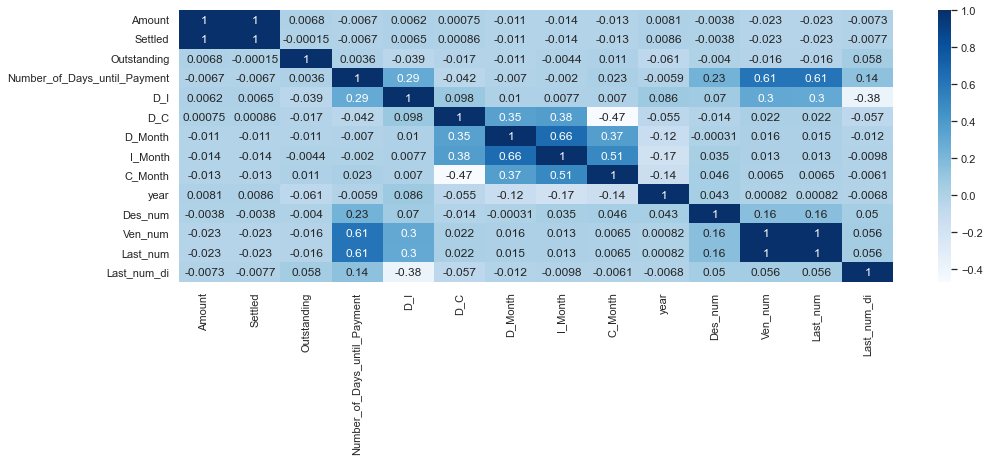

In [26]:
dataplot = sns.heatmap(train_df.corr(), cmap="Blues", annot=True)
plt.show()

##### Choosing Features for Training the models
> From the correlation heatmap and after lot of trial and error we dropped ['Due_Date','Description','Vendor_Name','Created','Invoice_Date','Last_num_di','Ven_num_di','Des_num'] features to avoid over-fitting the model.

In [27]:
train_df.drop(['Due_Date','Description','Vendor_Name','Created','Invoice_Date','Last_num_di','Ven_num_di','Des_num'],axis=1,inplace=True)
test_df.drop(['Due_Date','Description','Vendor_Name','Created','Invoice_Date','Last_num_di','Ven_num_di','Des_num'],axis=1,inplace=True)

In [28]:
y = train_df.Number_of_Days_until_Payment
X = train_df.drop(['Number_of_Days_until_Payment'],axis=1)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=5)

##### Models and Training
- Multiple models were tried and implemented on the final training data including CatBoost, XGBOOST, RandomForestRegressor, LGBM.
- The Best scores were from an ensemble of CatBoost and RandomForestRegressor.
- Grid search was used to fine tune the CatBoost model 

In [30]:
# !pip install catboost
import catboost as cb
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [31]:
model1 = cb.CatBoostRegressor(n_estimators=1500)
grid = {
        'learning_rate': [0.007,0.05,0.1],
        'depth': [1,6],
        'l2_leaf_reg': [0.1,0.3]}
model1.grid_search(grid, train_dataset)

0:	learn: 51.8179976	test: 51.9340728	best: 51.9340728 (0)	total: 136ms	remaining: 3m 23s
1:	learn: 51.5348375	test: 51.6478909	best: 51.6478909 (1)	total: 138ms	remaining: 1m 43s
2:	learn: 51.2556733	test: 51.3651816	best: 51.3651816 (2)	total: 139ms	remaining: 1m 9s
3:	learn: 50.9871260	test: 51.0948795	best: 51.0948795 (3)	total: 140ms	remaining: 52.2s
4:	learn: 50.7109216	test: 50.8149883	best: 50.8149883 (4)	total: 141ms	remaining: 42s
5:	learn: 50.4371505	test: 50.5377382	best: 50.5377382 (5)	total: 142ms	remaining: 35.3s
6:	learn: 50.1656605	test: 50.2626059	best: 50.2626059 (6)	total: 143ms	remaining: 30.4s
7:	learn: 49.8965115	test: 49.9898387	best: 49.9898387 (7)	total: 144ms	remaining: 26.8s
8:	learn: 49.6296370	test: 49.7200355	best: 49.7200355 (8)	total: 145ms	remaining: 24s
9:	learn: 49.3652601	test: 49.4519583	best: 49.4519583 (9)	total: 146ms	remaining: 21.7s
10:	learn: 49.1028991	test: 49.1868078	best: 49.1868078 (10)	total: 147ms	remaining: 19.9s
11:	learn: 48.8441106

{'params': {'depth': 6, 'learning_rate': 0.05, 'l2_leaf_reg': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
  

In [32]:
from sklearn.metrics import mean_squared_error
pred1 = model1.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred1)))
print('Testing performance CatBoost')
print('RMSE: {:.2f}'.format(rmse))

Testing performance CatBoost
RMSE: 21.07


>We also tried addding a new feature to our training using the predictions from one model and passing them through another model but we were unable to get any significant imporvement in our score.

In [33]:
# train_pred1 = model1.predict(X_train)
# X_train['pred_1'] = train_pred1/X_train['D_I']
# X_train.reset_index(inplace=True)
# X_train.drop(['index'],axis=1,inplace=True)
# X_train.sort_index()
# X_test['pred_1'] = pred1/X_test['D_I']
# X_test.reset_index(inplace=True)
# X_test.drop(['index'],axis=1,inplace=True)
# X_test.sort_index()

In [34]:
# import xgboost as xgb
# from xgboost import XGBRegressor

# model2 = xgb.XGBRegressor(n_estimators=7500, learning_rate=0.05)
# model2.fit(X_train, y_train,
#             eval_set=[(X_test, y_test)], 
#             early_stopping_rounds=100)

In [35]:
# pred2 = model2.predict(X_test)
# rmse = (np.sqrt(mean_squared_error(y_test, pred2)))
# print('Testing performance XGBOOST')
# print('RMSE: {:.2f}'.format(rmse))

In [36]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(max_depth=100, random_state=0)
model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, random_state=0)

In [37]:
pred2 = model2.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred2)))
print('Testing performance RandomForestRegressor')
print('RMSE: {:.2f}'.format(rmse))

Testing performance RandomForestRegressor
RMSE: 20.88


In [38]:
pred = (pred1+pred2)/2
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))

Testing performance
RMSE: 20.60


In [39]:
model1.fit(X,y)
model2.fit(X,y)

0:	learn: 27.6236668	total: 4.02ms	remaining: 6.03s
1:	learn: 27.1616435	total: 8.36ms	remaining: 6.26s
2:	learn: 26.7288440	total: 12ms	remaining: 6s
3:	learn: 26.3166328	total: 15.7ms	remaining: 5.89s
4:	learn: 25.9374465	total: 19.5ms	remaining: 5.83s
5:	learn: 25.5829352	total: 23.5ms	remaining: 5.86s
6:	learn: 25.2535550	total: 27.1ms	remaining: 5.78s
7:	learn: 24.9477356	total: 30.7ms	remaining: 5.73s
8:	learn: 24.6698206	total: 34.2ms	remaining: 5.67s
9:	learn: 24.4290409	total: 37.6ms	remaining: 5.61s
10:	learn: 24.2120367	total: 41ms	remaining: 5.55s
11:	learn: 23.9751335	total: 44.8ms	remaining: 5.55s
12:	learn: 23.7786531	total: 48.4ms	remaining: 5.53s
13:	learn: 23.5950598	total: 51.9ms	remaining: 5.51s
14:	learn: 23.4264920	total: 55.1ms	remaining: 5.46s
15:	learn: 23.2661051	total: 58.5ms	remaining: 5.43s
16:	learn: 23.1224009	total: 62.2ms	remaining: 5.42s
17:	learn: 22.9910877	total: 65.8ms	remaining: 5.41s
18:	learn: 22.8688241	total: 69ms	remaining: 5.38s
19:	learn: 2

RandomForestRegressor(max_depth=100, random_state=0)

### Model Inference

In [40]:
pred1 = model1.predict(test_df)
pred2 = model2.predict(test_df)
pred = (pred1+pred2)/2

In [41]:
pred

array([20.9514166 , 64.71625207, 23.36757671, ..., 35.62172447,
       44.39362718, 29.99153124])

In [42]:
df = pd.read_csv('sampleSubmission.csv')
df.head()

,Vendor_Name,Number_of_Days_Until_Payment
0,Aaron Hoffman,100
1,Aaron Murphy,100
2,Aaron Parks,100
3,Aaron Thomas,100
4,Abigail Hernandez,100


In [43]:
n = df.columns[1]
df.drop(n, axis = 1, inplace = True)
df[n] = pred
df

,Vendor_Name,Number_of_Days_Until_Payment
0,Aaron Hoffman,20.951417
1,Aaron Murphy,64.716252
2,Aaron Parks,23.367577
3,Aaron Thomas,44.986341
4,Abigail Hernandez,39.380801
...,...,...
1120,Zachary Coleman,35.994764
1121,Zachary Dudley,29.266640
1122,Zachary Hernandez,35.621724
1123,Zachary Simmons,44.393627


In [44]:
df.to_csv('out.csv',index = False)